In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
%matplotlib notebook

## Our project
We see the air around us to be the same, but not all of the gaseous molecules in air are moving at the same speed. Some move faster than others while some do not move at all. With the many different possible speeds, it is difficult to answer questions like "What is the speed of a gaseous molecule?" and "What impacts the speed of these molecules?".

In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann figured out an answer to that question: “What is the distribution of speeds in a gas at a certain temperature?” – resulting in the creation of the Maxwell-Boltzmann distribution (1). The Maxwell-Boltzmann distribution is now often represented in the following graph:

![](https://www.chemistrystudent.com/images/ASPhysical/kinetics/maxwell-boltzmann1.png)


As you can see, the curve is not symmetrical, rather it is skewed to the left with a longer tail on the right. The area under the graph represents the number of molecules per unit speed.
<br />
<br />The mathematical equation for the Maxwell-Boltzmann distribution can look a little intimidating but fear not, because you do not need to really fully understand the equation to understand the concepts of the Maxwell-Boltzmann distribution.

$f(v) = 4\pi v^2 \left(\frac{m}{2\pi kT}\right)^{3/2} e^{\left(\frac{-mv^2}{2kT}\right)}$
<br />
- f(v) is the probability density function for the velocity v, <br /> to observe the likelihood of a particle existing at the state for a given value of T and v 
- m is the mass of the particles
- k is the Boltzmann constant, of value $1.380649 × 10^{-23} m^2kgs^{-2} K^{-1}$
- T is the temperature in Kelvin

From the equation, we can see that the probability density depends on 2 factors:
- Temperature (T) of the gas
- Mass (m) of the molecules

Of course, visual representations are useful in helping understand scientific concepts. However, interactive visuals would better facilitate learning

## Manipulating the Factors of the Maxwell-Boltzmann Distribution
There are 2 main variables, temperature and mass, covered in the Maxwell-Boltzmann Distribution. To understand how these factors impact the energy of particles, the Maxwell-Boltzmann equation can be used to create a graph that reflects the Maxwell-Boltzmann distribution with regards to changing variable values.

The code for this segment is inspired. Click on the link to view the source code: https://github.com/Abravene/Python-Notebooks-for-Physical-Chemistry/blob/main/Maxwell_Boltzmann_Distribution_Notebook.ipynb (2)

### Changing Temperature of the System
Let us first experiment with different temperatures for a constant mass. By theory, an increase in temperature will result in a widening of the Maxwell-Boltzmann distribution as particles gain heaat energy, thus increasing the energy of the individual particles in the system (3).

Here, we are utilising the mass of nitrogen as it is the most abundent gas in our natural air. As mentioned previously, the Maxwell-Boltzmann equation accounts for both mass and temperature as its variables. Since we are experimenting with the distribution of particle energy at different temperatures, we will be defining the Boltzmann constant, mass, and velocity range only. As for the temperature value, the user can manually change the value by sliding the slider generated from the code.

Fiddle with the slider and observe the changes!

<IPython.core.display.Javascript object>


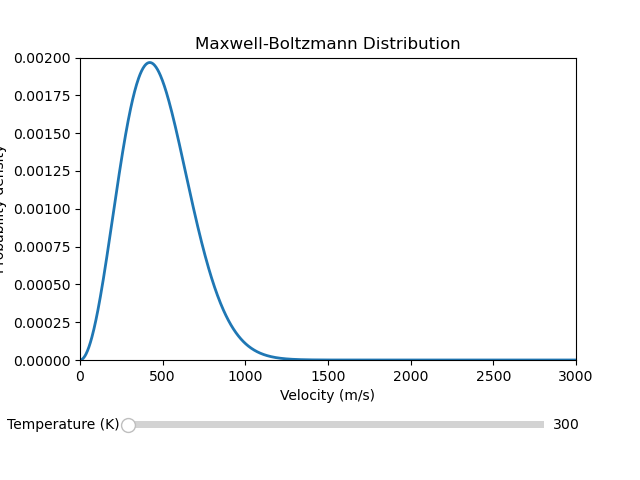

In [20]:
# Define constant values
k = 1.38e-23 # Boltzmann constant
m = 4.65e-26 # Mass of a nitrogen molecule in kg
v = np.linspace(0, 3000, 1000) # Velocity range

# Define the Maxwell-Boltzmann distribution function
def maxwell_boltzmann(v, T):
    return 4*np.pi*(m/(2*np.pi*k*T))**1.5*v**2*np.exp(-m*v**2/(2*k*T))

# Create the figure and subplot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

# Plot the initial distribution for T=300 K
line, = ax.plot(v, maxwell_boltzmann(v, 300), lw=2)

# Add a slider for changing the temperature
axtemp = plt.axes([0.2, 0.1, 0.65, 0.03])
slider_temp = Slider(axtemp, 'Temperature (K)', 300, 1000)

# Update the plot when the slider is changed
def update(val):
    line.set_ydata(maxwell_boltzmann(v, slider_temp.val))
    fig.canvas.draw_idle()

slider_temp.on_changed(update)

# Set the axis labels and title
ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Probability density')
ax.set_title('Maxwell-Boltzmann Distribution')

# Set the initial plot limits
ax.set_xlim(0, 3000)
ax.set_ylim(0, 0.002)

# Show the plot
plt.show()

### Changing the Mass of the System
Let us now experiment on the same system with different masses and a constant temperature.

By theory, an increase in mass of the particles will cause the Maxwell-Boltzmann distribution to decrease in spread (3).

The code is similar to the previous block of code, with 2 main differences. Firstly, since we would be evaluating the change in particle energy distribution with varying masses, the value of the temperature (T) would now be fixed and defined as a constant value (400k). Secondly, since mass is now a variable, its value would not be defined at the start of the code, but rather be a variable value that can be changed with the slider. Fiddle with the slider and observe the changes!

<IPython.core.display.Javascript object>


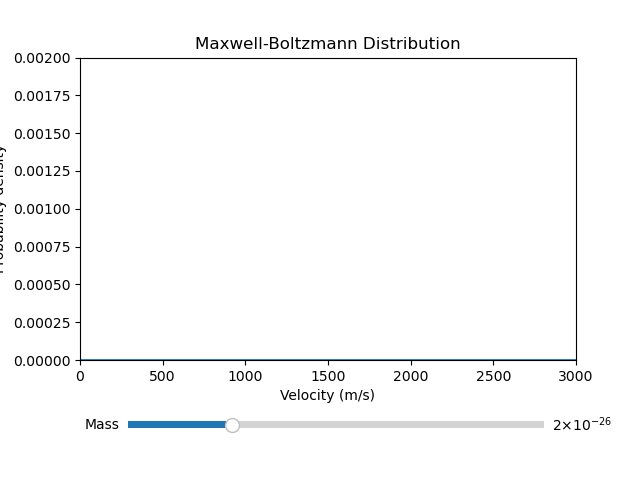

In [21]:
# Define constant values
T = 400 #Kelvin
k = 1.38e-23 # Boltzmann constant
v = np.linspace(0, 3000, 1000) # Velocity range

# Define the Maxwell-Boltzmann distribution function
def maxwell_boltzmann(v, m):
    return 4*np.pi*(m/(2*np.pi*k*T))**1.5*v**2*np.exp(-m*v**2/(2*k*T))

# Create the figure and subplot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

# Plot the initial distribution for m=5
line, = ax.plot(v, maxwell_boltzmann(v, 5), lw=2)

# Add a slider for changing the mass
axmass = plt.axes([0.2, 0.1, 0.65, 0.03])
slider_mass = Slider(axmass, 'Mass', 1e-26, 5e-26, valinit=2e-26)

# Update the plot when the slider is changed
def update(val):
    line.set_ydata(maxwell_boltzmann(v, slider_mass.val))
    fig.canvas.draw_idle()

slider_mass.on_changed(update)

# Set the axis labels and title
ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Probability density')
ax.set_title('Maxwell-Boltzmann Distribution')

# Set the initial plot limits
ax.set_xlim(0, 3000)
ax.set_ylim(0, 0.002)

# Show the plot
plt.show()

## Maxwell-Boltzmann Distribution Simulation
The following code is created to allow users to visualise the particle behaviour that yields the Maxwell-Boltzmann Distribution. The code yields a simulated animation, along with a corresponding animated graph to present the real-time changes in particle energy during the simulation. This is important in helping users understand how the individual particles behave within a system, and how the system stabilises to form the Maxwell-Boltzmann dsitribution graphs as observed earlier.

The code use in this segment is derived from https://github.com/davesspace/tutorial-thermodynamics/blob/main/particlesim.py (4).

### Using class
>A class in Python is like a blueprint or a template for creating objects. It defines properties and methods of an object. When you create an object based on a class, the resulting object has the same properties and behaviors defined in the class.

In this block of code below, we are using class to create an object - Particle. The initial attributes of the class Particle are defined in the function as shown in the code below.


In [14]:
class Particle():

    def __init__(self, id=0, r=np.zeros(2), v=np.zeros(2), R=1E-2, m=1, color='black'):
        self.id= id      #identify different particles
        self.r=r         #position of particle
        self.v=v         #velocity of particle
        self.R=R         #radius of particle
        self.m=m         #mass of particle
        self.color=color #color of particle

In the block of code below, we are once again using class to create another object - the simulation itself. We used multiple functions to reflect that of a real life simulation, taking into considering particle-particle collisions, and collision of the particles with the walls of the container.

In [15]:
class Sim():
    
    #size of box
    X = 1
    Y = 1

    def __init__(self, dt=50E-6, Np=20):
        self.dt, self.Np = dt, Np
        self.particles = [Particle(i) for i in range(self.Np)]

    #check for collision
    def collision_detection(self):
        #collision with wall
        ignore_list = []
        for particle1 in self.particles:
            if particle1 in ignore_list:
                continue
            x, y = particle1.r
            if ((x > self.X/2 - particle1.R) or (x < -self.X/2+particle1.R)):
                particle1.v[0] *= -1
            if ((y > self.Y/2 - particle1.R) or (y < -self.Y/2+particle1.R)):
                particle1.v[1] *= -1
                
            #particle-particle collision
            for particle2 in self.particles:
                if id(particle1) == id(particle2):
                    continue
                m1, m2, r1, r2, v1, v2 = particle1.m, particle2.m, particle1.r, particle2.r, particle1.v, particle2.v
                if np.dot(r1-r2, r1-r2) <= (particle1.R + particle2.R)**2:
                    v1_new = v1 - 2*m1 / \
                        (m1+m2) * np.dot(v1-v2, r1-r2) / \
                        np.dot(r1-r2, r1-r2)*(r1-r2)
                    v2_new = v2 - 2*m1 / \
                        (m1+m2) * np.dot(v2-v1, r2-r1) / \
                        np.dot(r2-r1, r2-r1)*(r2-r1)
                    particle1.v = v1_new
                    particle2.v = v2_new
                    ignore_list.append(particle2)

    def increment(self):
    # new position after collision
        self.collision_detection()
        for particle in self.particles:
            particle.r += self.dt * particle.v

    def particle_positions(self):
    # locus of particle
        return [particle.r for particle in self.particles]

    def particle_colors(self):
    # colour of the particles
        return [particle.color for particle in self.particles]

    def particle_speeds(self):
    # speed of particles
        return [np.sqrt(np.dot(particle.v, particle.v)) for particle in self.particles]

    def E_avg(self):
    # average energy of the particles
        E_avg = 0
        for particle in self.particles:
            E_avg += 0.5*particle.m*np.dot(particle.v, particle.v)
        return E_avg/len(self.particles)

    def temperature(self):
    # temperature of the particles based on the energy
        return self.E_avg()*(2/3)/1.380649E-23

Following which, we are setting the parameters of the system (e.g. number of particles) in order to run our simulation.

<IPython.core.display.Javascript object>


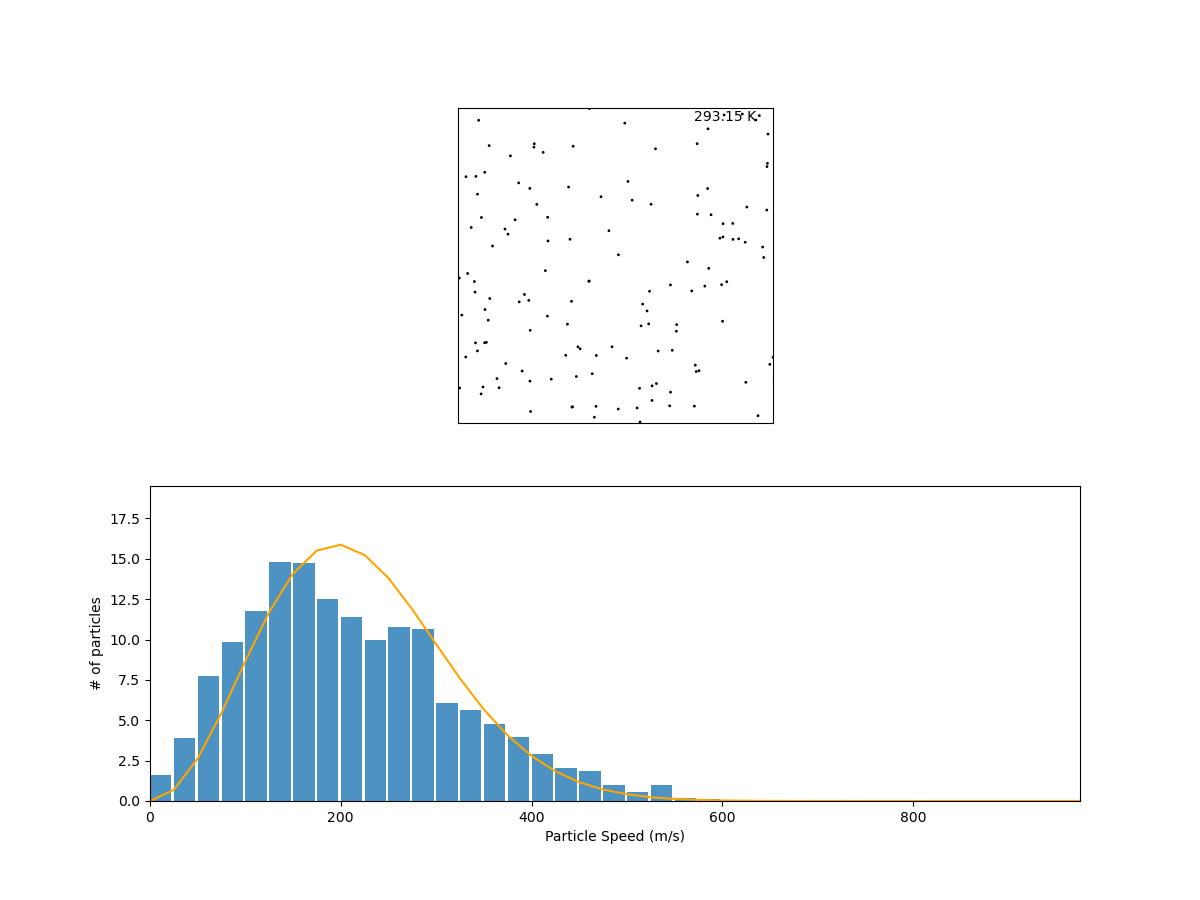

In [16]:
# sim variables
Np = 150                                        #number of particles
m = 127*1.66E-27                                #mass 
T_init = 293.15                                 #initial temperature

v_avg = np.sqrt(3/2*1.380649E-23*T_init*2/m)    #average velocity

sim = Sim(Np=Np)

for particle in sim.particles:
    particle.m = m
    particle.r = np.random.uniform([-sim.X/2, -sim.Y/2], [sim.X/2, sim.Y/2], size=2)
    particle.v = v_avg * np.array([np.cos(np.pi/4), np.cos(np.pi/4)])


# visualize code

n_avg = 100

fig, (ax, ax2) = plt.subplots(figsize=(12, 9), nrows=2)
ax.set_xticks([]), ax.set_yticks([])
ax.set_aspect("equal")

#values of x-axis (velocity)
vs = np.arange(0, 1000, 25)

scatter = ax.scatter([], [], s=1)

bar = ax2.bar(vs, [0]*len(vs), width=0.9 *
              np.gradient(vs), align="edge", alpha=0.8)

theo = ax2.plot(vs, 25*Np*(m/(2*np.pi*1.380649E-23*sim.temperature()))**(3/2) * 4 *
                np.pi*vs**2 * np.exp(-m*vs**2/(2*1.380649E-23*sim.temperature())), color="orange")

T_txt = ax.text(sim.X/2*0.5, sim.Y/2*0.92, s="")

freqs_matrix = np.tile((np.histogram(sim.particle_speeds(), bins=vs)[
                       0].astype(float)), (n_avg, 1))

# store plot in a function
def init():
    ax.set_xlim(-sim.X/2, sim.X/2)
    ax.set_ylim(-sim.Y/2, sim.Y/2)
    ax2.set_xlim(vs[0], vs[-1])
    ax2.set_ylim(0, Np)
    ax2.set(xlabel="Particle Speed (m/s)", ylabel="# of particles")
    return (scatter, *bar.patches)

# update frame by frame for animation
def update(frame):
    sim.increment()

    T_txt.set_text(f"{sim.temperature():.2f} K")

    freqs, bins = np.histogram(sim.particle_speeds(), bins=vs)
    freqs_matrix[frame % n_avg] = freqs
    freqs_mean = np.mean(freqs_matrix, axis=0)
    freqs_max = np.max(freqs_mean)

    for rect, height in zip(bar.patches, freqs_mean):
        rect.set_height(height)

    if np.abs(freqs_max - ax2.get_ylim()[1]) > 10:
        ax2.set_ylim(0, 5 + ax2.get_ylim()
                     [1] + (freqs_max - ax2.get_ylim()[1]))
        fig.canvas.draw()

    scatter.set_offsets(np.array(sim.particle_positions()))
    scatter.set_color(sim.particle_colors())
    return (scatter, *bar.patches, T_txt)

# animate the simulation
ani = FuncAnimation(fig, update, frames=range(
    2400), init_func=init, blit=True, interval=1/30, repeat=False)

## Input mass and temperature
In the previous block of code, the simulation was created using pre-set mass and initial temperatures. However, for more intuitive understanding and interaction with code, the following block of code allows users to manually input their desired temperature and mass values.

After creating a customised simulation with the input values, the user can compare the graphs obtained with the graphs generated from the default values.

Mass of a particle: 2
Temperature: 2


<IPython.core.display.Javascript object>


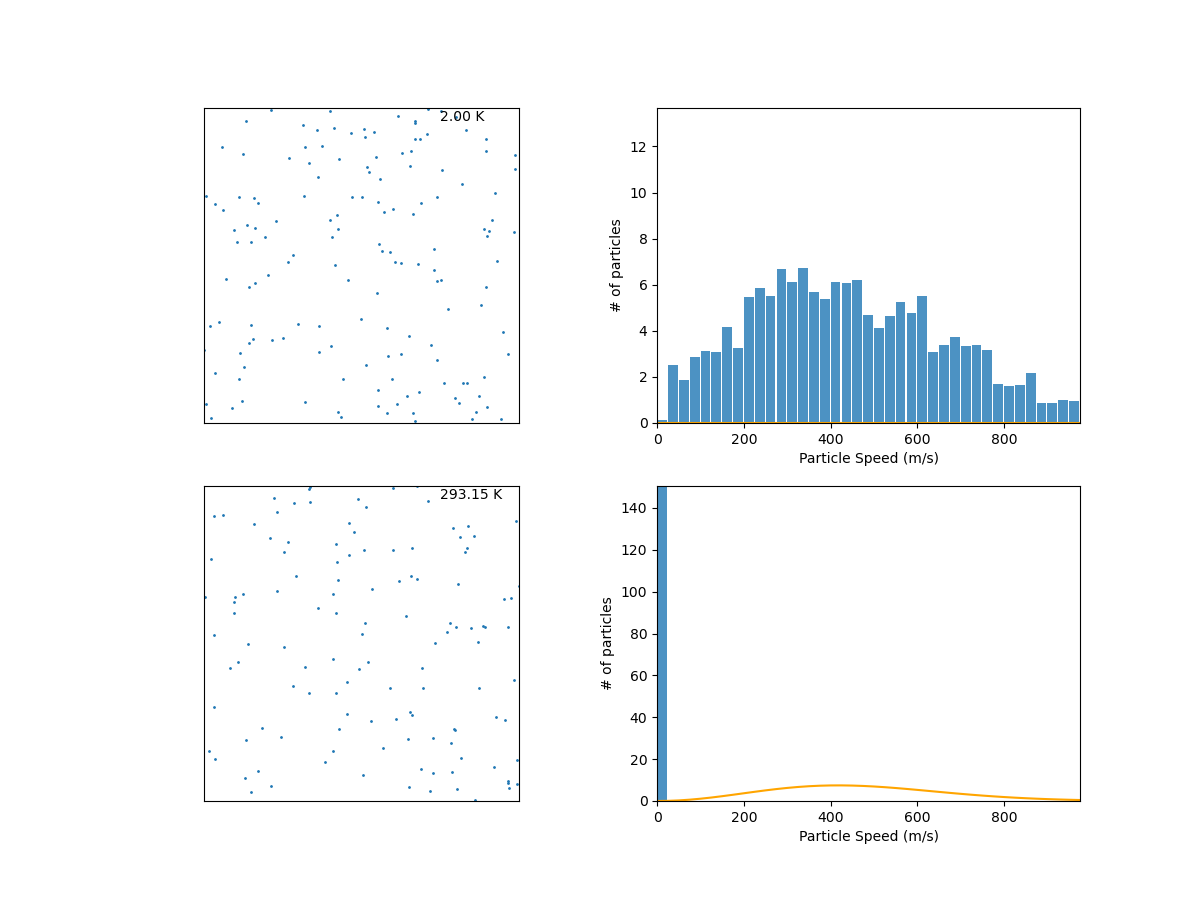

In [22]:
# sim variables
Np = 150                                        #number of particles

m = eval(input("Mass of a particle: ") or '4.65E-26')
T_init =eval(input("Temperature: ") or '293.15')
v_avg = np.sqrt(3/2*1.380649E-23*T_init*2/m)    #average velocity
sim = Sim(Np=Np)

m0 = 4.65e-26
T_init0 = 293.15
v_avg0 = np.sqrt(3/2*1.380649E-23*293.15*2/4.65e-26)    #average velocity
sim0 = Sim(Np=Np)

# Defining attributes of particles
for particle in sim.particles:
    particle.m = m
    particle.r = np.random.uniform([-sim.X/2, -sim.Y/2], [sim.X/2, sim.Y/2], size=2)
    particle.v = v_avg * np.array([np.cos(np.pi/4), np.cos(np.pi/4)])
    
for particle0 in sim0.particles:
    particle0.m = m0
    particle0.r = np.random.uniform([-sim0.X/2, -sim0.Y/2], [sim0.X/2, sim0.Y/2], size=2)
    particle0.v = v_avg0 * np.array([np.cos(np.pi/4), np.cos(np.pi/4)])
    
# visualize code
# creating subplots for comparison
n_avg = 100
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12, 9))
ax = axes[0,0]      #plot f
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]
ax.set_xticks([]), ax.set_yticks([])
ax.set_aspect("equal")
ax3.set_xticks([]), ax3.set_yticks([])
ax3.set_aspect("equal")

#values of x-axis (velocity)
vs = np.arange(0, 1000, 25)

scatter = ax.scatter([], [], s=1)
scatter0 = ax3.scatter([], [], s=1)

bar = ax2.bar(vs, [0]*len(vs), width=0.9 *
              np.gradient(vs), align="edge", alpha=0.8)
bar0 = ax4.bar(vs, [0]*len(vs), width=0.9 *
              np.gradient(vs), align="edge", alpha=0.8)

theo = ax2.plot(vs, 25*Np*(m/(2*np.pi*1.380649E-23*sim.temperature()))**(3/2) * 4 *
                np.pi*vs**2 * np.exp(-m*vs**2/(2*1.380649E-23*sim.temperature())), color="orange")
theo0 = ax4.plot(vs, 25*Np*(m0/(2*np.pi*1.380649E-23*sim0.temperature()))**(3/2) * 4 *
                np.pi*vs**2 * np.exp(-m0*vs**2/(2*1.380649E-23*sim0.temperature())), color="orange")

T_txt = ax.text(sim.X/2*0.5, sim.Y/2*0.92, s="")
T_txt0 = ax3.text(sim0.X/2*0.5, sim0.Y/2*0.92, s="")

freqs_matrix = np.tile((np.histogram(sim.particle_speeds(), bins=vs)[
                       0].astype(float)), (n_avg, 1))
freqs_matrix0 = np.tile((np.histogram(sim0.particle_speeds(), bins=vs)[
                       0].astype(float)), (n_avg, 1))

# store plot in a function
def init():
    ax.set_xlim(-sim.X/2, sim.X/2)
    ax.set_ylim(-sim.Y/2, sim.Y/2)
    ax2.set_xlim(vs[0], vs[-1])
    ax2.set_ylim(0, Np)
    ax2.set(xlabel="Particle Speed (m/s)", ylabel="# of particles")
    
    ax3.set_xlim(-sim0.X/2, sim0.X/2)
    ax3.set_ylim(-sim0.Y/2, sim0.Y/2)
    ax4.set_xlim(vs[0], vs[-1])
    ax4.set_ylim(0, Np)
    ax4.set(xlabel="Particle Speed (m/s)", ylabel="# of particles")
    return (scatter, *bar.patches)

# update frame by frame for animation
def update(frame):
    sim.increment()
    T_txt.set_text(f"{sim.temperature():.2f} K")
    freqs, bins = np.histogram(sim0.particle_speeds(), bins=vs)
    freqs_matrix[frame % n_avg] = freqs
    freqs_mean = np.mean(freqs_matrix, axis=0)
    freqs_max = np.max(freqs_mean)
    
    for rect, height in zip(bar.patches, freqs_mean):
        rect.set_height(height)
    
    if np.abs(freqs_max - ax2.get_ylim()[1]) > 10:
        ax2.set_ylim(0, 5 + ax2.get_ylim()
                     [1] + (freqs_max - ax2.get_ylim()[1]))
        fig.canvas.draw()
    scatter.set_offsets(np.array(sim.particle_positions()))
    
    sim0.increment()
    T_txt0.set_text(f"{sim0.temperature():.2f} K")
    freqs0, bins = np.histogram(sim.particle_speeds(), bins=vs)
    freqs_matrix0[frame % n_avg] = freqs0
    freqs_mean0 = np.mean(freqs_matrix0, axis=0)
    freqs_max0 = np.max(freqs_mean0)
    
    for rect0, height0 in zip(bar0.patches, freqs_mean0):
        rect0.set_height(height0)

    if np.abs(freqs_max0 - ax4.get_ylim()[1]) > 10:
        ax4.set_ylim(0, 5 + ax4.get_ylim()
                     [1] + (freqs_max0 - ax4.get_ylim()[1]))
        fig.canvas.draw() 
    scatter0.set_offsets(np.array(sim0.particle_positions()))
    return (scatter, *bar.patches, T_txt, scatter0, *bar0.patches, T_txt0)


# animate the simulation
ani = FuncAnimation(fig, update, frames=range(
    2400), init_func=init, blit=True, interval=1/30, repeat=False)

## Neglecting Particle-Particle Collision
In the previous blocks of code used to create the simulations, they all account for particle-particle collisions. Accounting for particle-particle collisions is important as the speed of the particles will change when it collides with each other, resulting in a change in the Maxwell-Boltzmann Distribution. Moreover, particle-particle collision is also important in determining the rate of reaction, and hence facilitates a greater understanding of thermodynamics (3).

The need to account for particle-particle collision also explains why ideal gas assumptions was not followed in the previous blocks of code. An important assumption for ideal gases is that the particles have perfectly elastic collisions (with other particles or with the sides of the container that the particles are contained in). 

This simulation shows that particle-particle collision is necessary for the particles to follow the Maxwell-Boltzmann distribution. As observed in the graph, the distribution of particle energy will not spread and stabilise to reflect the typical Maxwell-Boltzmann distribution.

<IPython.core.display.Javascript object>


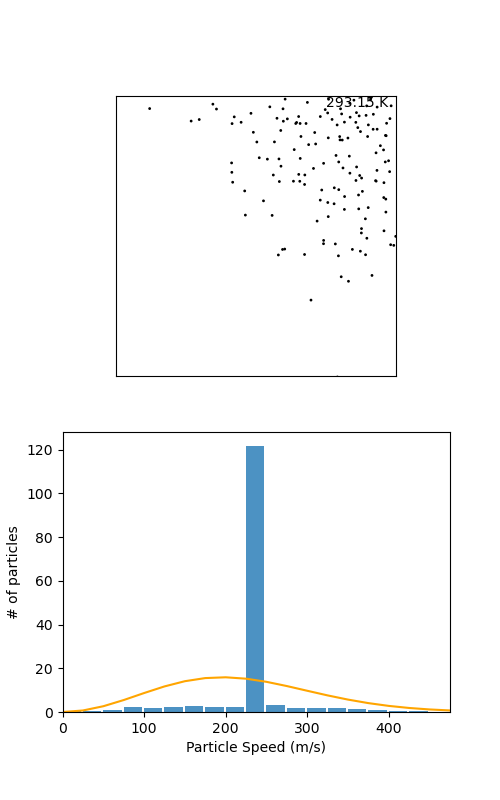

In [24]:
# sim variables
Np = 150                                        #number of particles
m = 127*1.66E-27                                #mass 
T_init = 293.15                                 #initial temperature

v_avg = np.sqrt(3/2*1.380649E-23*T_init*2/m)    #average velocity

sim = Sim(Np=Np)

for particle in sim.particles:
    particle.m = m
    particle.r = np.random.uniform([-sim.X/2, -sim.Y/2], [sim.X/2, sim.Y/2], size=2)
    particle.v = v_avg * np.array([np.cos(np.pi/4), np.cos(np.pi/4)])


# visualize code

n_avg = 100

fig, (ax, ax2) = plt.subplots(figsize=(5, 8), nrows=2)
ax.set_xticks([]), ax.set_yticks([])
ax.set_aspect("equal")

vs = np.arange(0, 500, 25)

scatter = ax.scatter([], [], s=1)
bar = ax2.bar(vs, [0]*len(vs), width=0.9 *
              np.gradient(vs), align="edge", alpha=0.8)

theo = ax2.plot(vs, 25*Np*(m/(2*np.pi*1.380649E-23*sim.temperature()))**(3/2) * 4 *
                np.pi*vs**2 * np.exp(-m*vs**2/(2*1.380649E-23*sim.temperature())), color="orange")

T_txt = ax.text(sim.X/2*0.5, sim.Y/2*0.92, s="")

freqs_matrix = np.tile((np.histogram(sim.particle_speeds(), bins=vs)[
                       0].astype(float)), (n_avg, 1))

# store plot in a function
def init():
    ax.set_xlim(-sim.X/2, sim.X/2)
    ax.set_ylim(-sim.Y/2, sim.Y/2)
    ax2.set_xlim(vs[0], vs[-1])
    ax2.set_ylim(0, Np)
    ax2.set(xlabel="Particle Speed (m/s)", ylabel="# of particles")
    return (scatter, *bar.patches)

# update frame by frame for animation
def update(frame):
    sim.increment()

    T_txt.set_text(f"{sim.temperature():.2f} K")

    freqs, bins = np.histogram(sim.particle_speeds(), bins=vs)
    freqs_matrix[frame % n_avg] = freqs
    freqs_mean = np.mean(freqs_matrix, axis=0)
    freqs_max = np.max(freqs_mean)

    for rect, height in zip(bar.patches, freqs_mean):
        rect.set_height(height)

    if np.abs(freqs_max - ax2.get_ylim()[1]) > 10:
        ax2.set_ylim(0, 5 + ax2.get_ylim()
                     [1] + (freqs_max - ax2.get_ylim()[1]))
        fig.canvas.draw()

    scatter.set_offsets(np.array(sim.particle_positions()))
    scatter.set_color(sim.particle_colors())
    return (scatter, *bar.patches, T_txt)

# animate the simulation
ani = FuncAnimation(fig, update, frames=range(
    2400), init_func=init, blit=True, interval=1/30, repeat=False)

## Conclusion
The Maxwell Boltzmann distribution is an interesting scientific concept that can help us understand thermodynamics, and how different conditions (e.g. temperature) impact the rate of a reaction. Our code firstly allows users to understand the direct impacts of varying conditions (e.g. temperature, mass) on the energy distribution of a gaseous system. The code then proceeds to allow for a deeper understanding of the Maxwell-Boltzmann distribution by illustrating the system itself via a simple animation. 

## References
